# Model Training

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import tensorflow as tf 

In [2]:
train = pd.read_csv('finalproject_train.csv')
test = pd.read_csv('finalproject_test.csv')
validate = pd.read_csv('finalproject_validation.csv')

In [3]:
train.head()

,file,f0_mean,f0_std,f0_var,f0_min,f0_max,f0_skew,f0_kurtosis,zcr_mean,zcr_std,...,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,mfcc_21,mfcc_22,mfcc_23,mfcc_24,label
0,file24569.mp3.wav_16k.wav_norm.wav_mono.wav_si...,113.146319,16.642187,276.962402,85.559503,143.064593,0.084161,-1.177386,0.164900,0.162481,...,-20.343092,-2.797815,-12.452229,-5.840678,-10.560199,0.486194,-7.003640,7.888074,-7.005135,0
1,file1886.mp3.wav_16k.wav_norm.wav_mono.wav_sil...,116.304929,20.466395,418.873322,89.605964,149.830708,0.278453,-1.560141,0.149197,0.125664,...,-10.500713,-4.870155,-14.144915,-8.112008,-5.849153,-8.864585,-3.883942,-4.553544,-5.014913,0
2,file5633.mp3.wav_16k.wav_norm.wav_mono.wav_sil...,101.062877,18.909091,357.553741,76.666417,139.796993,0.457587,-1.057336,0.101966,0.061466,...,-12.358951,2.754946,-2.687284,0.354355,-7.595921,2.471754,-6.340443,4.280274,-1.238021,0
3,file27375.wav_16k.wav_norm.wav_mono.wav_silenc...,111.522149,16.696594,278.776240,86.055144,147.256706,0.099230,-1.191811,0.183400,0.174183,...,-5.718417,-9.363831,-5.133481,-6.674107,-8.906966,-1.871459,-4.009862,8.324374,7.092777,0
4,file17442.mp3.wav_16k.wav_norm.wav_mono.wav_si...,99.681495,16.756603,280.783737,75.785828,147.256706,1.289548,1.524926,0.164946,0.137211,...,-12.736900,4.043910,-4.198049,3.157935,-5.054732,7.856312,-9.573131,5.844799,-4.269224,0


In [4]:
test.head()

,file,f0_mean,f0_std,f0_var,f0_min,f0_max,f0_skew,f0_kurtosis,zcr_mean,zcr_std,...,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,mfcc_21,mfcc_22,mfcc_23,mfcc_24,label
0,file433.wav_16k.wav_norm.wav_mono.wav_silence....,114.657629,17.063435,291.160818,81.695773,149.830708,-0.204652,-0.218891,0.142307,0.161818,...,-0.405546,-13.376277,-3.076412,-5.982931,-11.315242,0.856092,-12.025939,0.913260,-11.271635,0
1,file2194.wav_16k.wav_norm.wav_mono.wav_silence...,130.668198,9.017135,81.308729,114.208234,148.109755,0.106843,-0.723627,0.111010,0.111368,...,1.684451,-11.411838,-4.846194,-6.104938,-9.741377,2.274526,-12.481531,2.784695,-12.102964,0
2,file1551.wav_16k.wav_norm.wav_mono.wav_silence...,122.613931,13.243914,175.401263,98.282060,148.967746,0.192298,-0.748307,0.097664,0.110241,...,2.545182,-13.576818,-3.687814,-4.145748,-12.060222,1.285453,-12.949003,1.417001,-11.506231,0
3,file1047.wav_16k.wav_norm.wav_mono.wav_silence...,119.664392,19.624439,385.118605,97.153194,149.830708,0.150561,-1.694964,0.069599,0.034497,...,-0.280570,-18.221024,-0.481088,-6.795421,-9.312627,4.091344,-14.207133,3.683449,-13.111985,0
4,file1802.wav_16k.wav_norm.wav_mono.wav_silence...,110.506493,16.689550,278.541067,87.055056,146.408570,0.428767,-0.820130,0.135107,0.141607,...,-5.446749,-12.151406,1.295001,-22.025723,-7.067898,-12.497729,-6.048635,0.552761,-6.197958,0


In [5]:
validate.head()

,file,f0_mean,f0_std,f0_var,f0_min,f0_max,f0_skew,f0_kurtosis,zcr_mean,zcr_std,...,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,mfcc_21,mfcc_22,mfcc_23,mfcc_24,label
0,file788.mp3.wav_16k.wav_norm.wav_mono.wav_sile...,136.813780,8.729620,76.206267,101.747969,148.109755,-1.564041,3.818840,0.132270,0.120635,...,3.385038,-17.438786,-10.179822,5.373208,-3.794394,19.132391,10.359378,12.972460,5.344854,0
1,file28433.wav_16k.wav_norm.wav_mono.wav_silenc...,109.261443,13.717945,188.182022,91.700404,145.565318,0.977922,-0.315951,0.173355,0.130249,...,-16.228827,-6.682185,-2.542838,-6.784031,-4.679899,-2.703435,-6.633286,1.896547,-7.040866,0
2,file19302.mp3.wav_16k.wav_norm.wav_mono.wav_si...,102.249812,14.694031,215.914548,78.912915,147.256706,0.732109,0.474213,0.107678,0.089856,...,-1.631543,-1.669028,-9.276979,0.401367,-3.886419,-4.069922,-2.708086,1.215653,-5.558532,0
3,file30232.mp3.wav_16k.wav_norm.wav_mono.wav_si...,122.194141,14.415081,207.794567,91.172249,148.109755,-0.490192,-0.462632,0.075637,0.033315,...,0.517548,-17.974178,-2.031919,-6.728065,-12.158307,1.673301,-11.036796,-3.131088,-3.960863,0
4,file9463.mp3.wav_16k.wav_norm.wav_mono.wav_sil...,110.578947,29.832291,889.965566,74.054878,148.967746,0.115775,-1.785342,0.097222,0.078869,...,-3.590478,-17.051195,0.108770,-11.435762,-10.675420,1.270589,-14.656271,-2.911393,-5.560000,0


___

In [6]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import 


In [7]:
target_column = 'label'

numeric_columns = train.drop(columns=['label', 'file']).columns

scaler = MinMaxScaler()
scaler.fit(train[numeric_columns])
train_scaled = scaler.transform(train[numeric_columns])

train_scaled

array([[0.7085761 , 0.32779463, 0.10744932, ..., 0.3096917 , 0.42136532,
        0.19475092],
       [0.73396702, 0.40311854, 0.16250456, ..., 0.37920957, 0.22959281,
        0.23298167],
       [0.61144172, 0.37244494, 0.13871524, ..., 0.32447007, 0.36575544,
        0.30553307],
       ...,
       [0.64901714, 0.40540955, 0.16435691, ..., 0.52066579, 0.24119837,
        0.37010247],
       [0.72973567, 0.41116827, 0.16905934, ..., 0.36170788, 0.18506124,
        0.23932123],
       [0.71375876, 0.24870191, 0.06185264, ..., 0.33942073, 0.33660631,
        0.31364541]])

---

In [8]:
model = Sequential()

model.add(Dense(units=128, activation='relu', input_shape=(len(numeric_columns),)))

model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=16, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

/Users/joshwinnes/anaconda3/envs/voice/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
adam = keras.optimizers.Adam(learning_rate=0.00001)

In [10]:
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [11]:
model.fit(train_scaled, train['label'], epochs=20)

Epoch 1/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 2s 788us/step - accuracy: 0.4972 - loss: nan
Epoch 2/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.4976 - loss: nan
Epoch 3/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - accuracy: 0.4972 - loss: nan
Epoch 4/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - accuracy: 0.4984 - loss: nan
Epoch 5/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - accuracy: 0.4988 - loss: nan
Epoch 6/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 0.5085 - loss: nan
Epoch 7/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.5044 - loss: nan
Epoch 8/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.4969 - loss: nan
Epoch 9/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - accuracy: 0.5042 - loss: nan
Epoch 10/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - accuracy: 0.4987 - loss: nan
Epoch 11/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - accuracy: 0.5027 - loss: nan
Epoch 12/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accura

---

<Axes: xlabel='zcr_std', ylabel='Count'>

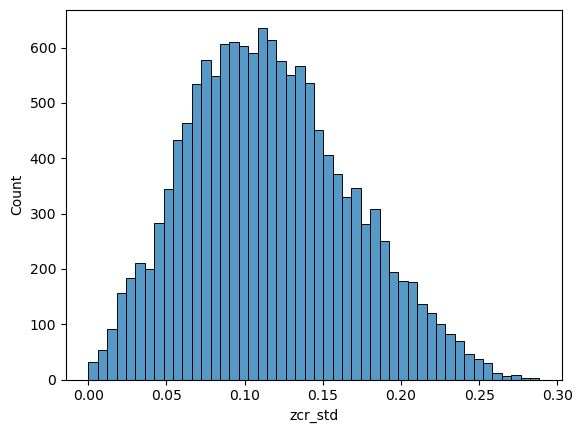

In [17]:
from scipy.optimize import linprog

In [ ]:
linprog()